Note that in this notebook I will explore the already processed dataset proposed in the research "Detection of Malicious Network Flows with Low Preprocessing Overhead".

#### Imports

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore")

#### Constants

In [4]:
WORK_DIR = "datasets"

#### Extracting the data

Using just a snippet of the data because the full dataset is very large

In [5]:
df = pd.read_csv(f"{WORK_DIR}/parsed_data/CNN_1-pkt_seed-101.csv")

In [6]:
df.head(5)

,dataset,label,subset,image
0,USTC,Facetime,0,424d1e0600000000000036000000280000001800000015...
1,USTC,Facetime,0,424d1e0600000000000036000000280000001800000015...
2,USTC,Facetime,0,424d1e0600000000000036000000280000001800000015...
3,USTC,Facetime,0,424d1e0600000000000036000000280000001800000015...
4,USTC,Facetime,0,424d1e0600000000000036000000280000001800000015...


Note that subset markes what row is for training and what row is for testing

In [114]:
print(f"{len(df[df.subset == 1])/len(df)*100}% of the data is for testing")

10.0% of the data is for testing


In [8]:
df.describe()

,subset
count,120000.000000
mean,0.100000
std,0.300001
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   dataset  120000 non-null  object
 1   label    120000 non-null  object
 2   subset   120000 non-null  int64 
 3   image    120000 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.7+ MB


In [11]:
df.label.unique()

array(['Facetime', 'FTP', 'Outlook', 'Zeus', 'Tinba', 'Htbot', 'Geodo',
       'Shifu', 'Neris', 'BitTorrent', 'Weibo', 'SMB', 'Skype', 'Virut',
       'MySQL', 'Miuref', 'WorldOfWarcraft', 'Nsis-ay', 'Cridex', 'Gmail'],
      dtype=object)

In [7]:
print(f"The amount of unique images in dataset - {len(df.image.unique())}")

The amount of unique images in dataset - 120000


Whic means the whole dataset is made of unique conversations

### Visualisation

In [118]:
from io import BytesIO
import matplotlib.pyplot as plt

In [123]:
def show_bmp_from_string(byte_string):
    """
    Displays a BMP image from a byte string
    """
    image_data = bytes.fromhex(byte_string)
    image_file = BytesIO(image_data)
    image = plt.imread(image_file, format='bmp')
    plt.imshow(image)
    plt.show()

Showing first image in the DataFrame

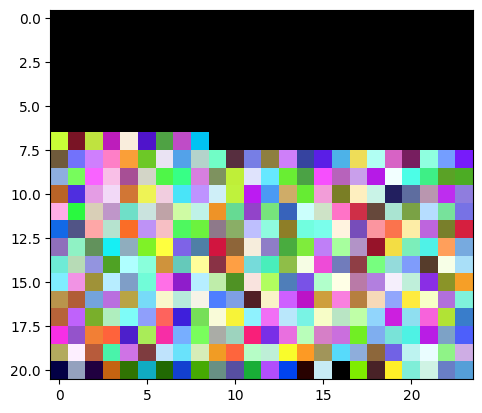

In [124]:
show_bmp_from_string(df.iloc[0].image)

Most of the preprocessing was already done for us, the pcaps's conversation flows are already converted to bitmap images which leavs us only the CNN model part